(homework03)=
# Homework 3

### Name, NetID, Collaborators
Please edit the markdown cell below for “Names & NetIDs” and enter:
- Your name and NetID (eg. cc5948), and
- The names and NetIDs of everyone with whom you have collaborated with (e.g., discussed
questions with, provided help to, received help from, etc.).

Our goal is to create an honest, collaborative, and positive learning environment. Keep
in mind that while collaboration in lab and homework is strongly encouraged, the work
you submitted must be your own (you typed them up yourself; you can explain what you
submitted). Your goal is to use the help and support to eventually understand the ideas
and the methods yourself

**Name and NetID:**


**Collaborators:**

## Part 1: NYC tees

### Exercise 1 - Load and explore tree data

There is a CSV file called `NYC_Tree_Census_small.csv` in the `~/shared/data` folder. This file contains information an excerpt from the [2015 New York City Tree Census](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh) shared by the [NYC OpenData project](https://data.cityofnewyork.us). 

- Import the NYC tree census data **from the local file** and store it as a data frame called `nyc_trees`.
- Look at the first three rows of `nyc_trees` to verify that it imported successfully and to get a sense of the data. 
- Look at the documentation of the data set on the website linked above. 
- In a markdown cell answer the following questions:
    * How many variables and observation are `nyc_trees`?
    * What does each observation represent?
    * What information is recorded in the `health` variable? What is the data type of this information?
    * What information is recorded in the `tree_dbh` variable? What are the units?

In [2]:
# import the data
nyc_trees <- read.csv('~/shared/data/NYC_Tree_Census_small.csv')

# load the dplyr package
library(dplyr)

head(nyc_trees, 3)

,X,tree_id,tree_dbh,stump_diam,status,health,spc_latin,spc_common,postcode,borough,latitude,longitude
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,1,21525,27,0,Alive,Good,Platanus x acerifolia,London planetree,11369,Queens,40.76482,-73.87812
2,2,588901,6,0,Alive,Good,Pyrus calleryana,Callery pear,11367,Queens,40.73043,-73.83008
3,3,512877,8,0,Alive,Good,Pyrus calleryana,Callery pear,10308,Staten Island,40.54974,-74.14891


In [38]:
dim(nyc_trees)
typeof(nyc_trees$health)

[1] 5000   12

[1] "character"

There are 5,000 observations and 12 variables in nyc_trees. Each observation corresponds to a tree. 

The status variable indicates the health of the tree. It is a character variable. 

The tree_dbh variable indicates the trees diameter at breast height in inches.

### Exercise 2 - Number of trees in Manhattan

- Determine the number of trees in nyc_trees that are located in Manhattan.
- Summarize your findings in a markdown cell.

In [15]:
nyc_trees %>% filter(borough == 'Manhattan') %>% nrow()

[1] 506

There are 506 trees located on Manhattan in the data set. 

### Exercise 3 - Manhattan trees

The `unique()` function outputs a vector where each value in the inputed vector is listed exactly once. See the cell below for an example.

```unique(VECTOR)```

- Use `unique()` to view the values in the status column of nyc_trees. Notice that all observations have the same value. 
- Use `filter()` and `select()` to create a data frame called `manhattan_trees` that contains all the variables in nyc_trees except status and borough and only contains trees on Manhattan. 
- Verify that this worked using `dim()` to verify that manhattan_trees has the expected number of variables and observations.
- Answer the following questions in a markdown cell. Don't forget units.
    * What is the maximum diameter of a tree on Manhattan? 
    * What is the minimum diameter of a tree on Manhattan?




In [6]:
unique(c(1,1,1,2,2,3))

[1] 1 2 3

In [16]:
unique(nyc_trees$status)

[1] "Alive"

In [19]:
manhattan_trees <- nyc_trees %>%
    filter(borough == 'Manhattan') %>%
    select(-status, -borough)

dim(manhattan_trees)

[1] 506  10

In [20]:
max(manhattan_trees$tree_dbh)
min(manhattan_trees$tree_dbh)

[1] 38

[1] 1

The maximum diameter of a tree in Manhattan is 36 inches and the minimum diameter is 1 inch. 

### Exercise 4 - Tree health numbers

- Use the ```group_by()``` and ```summarize()``` functions to determine how many of the trees in nyc_trees were recorded with each level of health.

In [9]:
nyc_trees %>%
    group_by(health) %>%
    summarize(Count = n())

health,Count
<chr>,<int>
Fair,730
Good,4091
Poor,179


### Exercise 5 - Custom order

We can use `factor()` to tell R our preferred order for the values in a categorical variable. Consider the following example.

A data set called `schools` contains a variable called `school_type` which indicates whether the given school is a 'kindergarten' (age 5), 'elementary school' (age 6 - 10), 'middle school' (age 11 - 13) or 'high school' (age 14 - 17). The following command will tell R that we prefer to sort `school_type` the the specified order rather than alphabetically.

``` schools <- mutate(schools, school_type = 
                factor(school_type, levels = c('kindergarten', 'elementary school', 'middle school', 'high school' ))
                )```

Here is the general syntax for factor:

```factor(VECTOR_OF_DATA, levels=VECTOR_OF_ORDERED_VALUES)```

The output of factor is VECTOR_OF_DATA with the additional structure of a specified order to the values.

- Use `factor()` to specify a more natural order for the health variable in nyc_trees
- Recreate the the summary table from the previous exercise and verify that the rows are now in your specified order.
- Store your summary table in a variable called `tree_health_count`.
- Output `tree_health_count`

In [39]:
tree_health_count <- nyc_trees %>%
    mutate(health = factor(health, levels=c("Good", "Fair", "Poor"))) %>%
    group_by(health) %>%
    summarize(Count = n())

### Exercise 6 - Visualize tree health

- Create a bar chart that shoes the number of trees with each level of health. 

In [11]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”


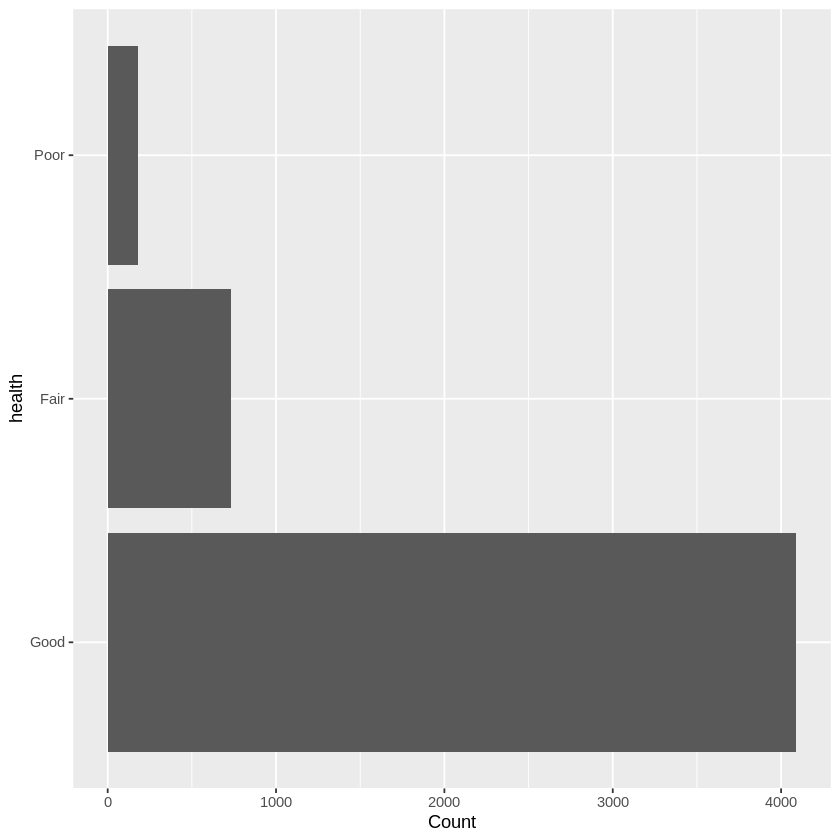

In [40]:
ggplot(tree_health_count, aes(x= Count, y= health)) + geom_col() # OK to swap x and y axes

## Part 2: City payroll

### Exercise 7 - Load and explore payroll data

There is a CSV file called `NYC_Payroll_small.csv` in the shared data folder. This file contains an excerpt from the [2021 New York City Payroll](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e) shared by the [NYC OpenData project](https://data.cityofnewyork.us). 

- Import the NYC tree census data **from the local file** and store it as a data frame called `nyc_payroll`.
- Look at the first three rows of `nyc_payroll` to verify that it imported successfully and to get a sense of the data. 
- Add a column called `Total_Wages` to nyc_payroll that contains the total amount of money that was payed to each employee. 

In [43]:
nyc_payroll <- read.csv('~/shared/data/NYC_Payroll_small.csv')
head(nyc_payroll,3)

,Fiscal.Year,Payroll.Number,Agency.Name,Last.Name,First.Name,Agency.Start.Date,Work.Location.Borough,Title.Description,Leave.Status.as.of.June.30,Base.Salary,Pay.Basis,Regular.Hours,Regular.Gross.Paid,OT.Hours,Total.OT.Paid,Total.Other.Pay
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,300,BOARD OF ELECTION POLL WORKERS,WORKMAN,EULENE,07/25/2013,MANHATTAN,ELECTION WORKER,ACTIVE,1.00,per Hour,0,1450.00,0.00,0.0,0.0
2,2019,466,COMMUNITY COLLEGE (MANHATTAN),GEORGE,MICHAEL,02/01/2004,MANHATTAN,NON-TEACHING ADJUNCT IV,ACTIVE,58.26,per Hour,6,349.56,0.00,0.0,0.0
3,2019,740,DEPARTMENT OF EDUCATION ADMIN,MITCHELL,SHARON,09/19/2016,MANHATTAN,COMMUNITY ASSOCIATE,ACTIVE,48945.00,per Annum,1825,49231.13,44.25,1791.8,313.5


In [45]:
nyc_payroll <- mutate(nyc_payroll, Total_Wages = Regular.Gross.Paid + Total.OT.Paid + Total.Other.Pay)

### Exercise 8 - Large payroll agencies

- Create a summary table called `large_payroll_agencies` that shows the total pay roll expenses in millions of dollars rounded to two decimal places for the ten agencies with the highest payroll expenses. 
- Output `large_payroll_agencies`.

In [46]:
large_payroll_agencies <- nyc_payroll %>%
    group_by(Agency.Name) %>%
    summarize(Total_Payroll = round(sum(Total_Wages)/10^6,2)) %>%
    arrange(desc(Total_Payroll)) %>%
    head(10)
large_payroll_agencies

Agency.Name,Total_Payroll
<chr>,<dbl>
DEPARTMENT OF CORRECTION,34.28
DEPARTMENT OF SANITATION,25.84
DEPARTMENT OF EDUCATION ADMIN,25.22
ADMIN FOR CHILDREN'S SVCS,17.09
DEPARTMENT OF TRANSPORTATION,15.09
DEPT OF ED HRLY SUPPORT STAFF,13.09
DEPT OF CITYWIDE ADMIN SVCS,6.44
COMMUNITY COLLEGE (MANHATTAN),5.65
DEPARTMENT OF BUILDINGS,4.29


### Exercise 9 - Visualize large payroll agencies

- Create a bar chart that shows the data in `large_payroll_agencies`. Order the agencies based on their total payroll. 

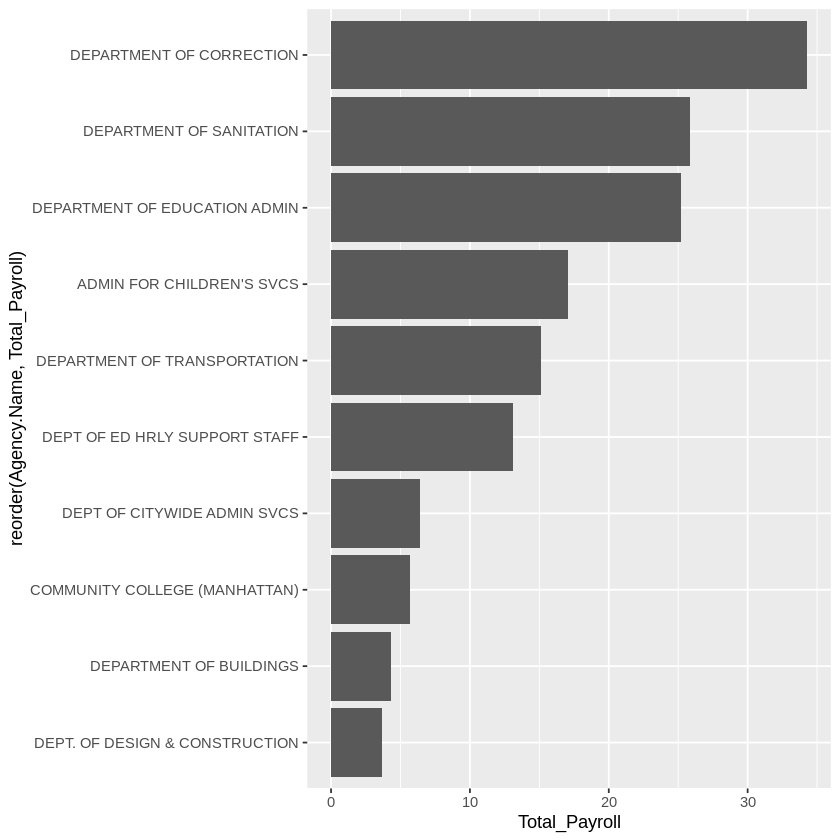

In [34]:
ggplot(large_payroll_agencies, aes(x = Total_Payroll, y = reorder(Agency.Name, Total_Payroll))) + geom_col()
    

## Part 3: A Quick Reflection
Briefly answer the prompts below in the markdown cell provided. (1-2 sentences for each prompt
is sufficient.)

### Exercise 10: What was helpful?
Indicate one question/part in this assignment that you find helpful in helping you understand
an idea or method introduced in class. This could be a question/task that you knew right
away how to do; one for which you kept encountering bugs/errors; or one that you needed
to think a while or discuss with others first to figure out.
(State which question/part and how it helps you with which idea/method.)

### Exercise 11: What was challenging / interesting?
Write one thing that you find challenging or interesting in this assignment. Briefly elaborate on what made it challenging or interesting. 

## Part 4: Generate PDF file and submit

### Print this notebook as PDF document
Download a PDF version of this notebook using one of the following strategies.

#### Strategy 1: Use print preview
Use the menu option File > Print Preview to generate a printer friendly version of this notebook. Then use your browsers print dialogue to save as PDF.
Use the following menu option to download a PDF version of this notebook.

#### Strategy 2: Use LaTeX
Use the menu option File > Download as > PDF via LaTeX (.pdf) generate a PDF file you can download. 

### Submit on Gradscope
Submit the PDF document on Gradescope. Be sure to assign a page to each question even if your document is only one
page, See the [Gradescope support page](https://help.gradescope.com/article/ccbpppziu9-student-submit-work#submitting_a_pdf) for detailed instructions. Assigning pages to questions greatly expedites the grading process.